In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
print("hello")

hello


In [25]:
epl_df = pd.read_csv("C:/datasets/epl/EPL_2021.csv",encoding="iso-8859-1")
         
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [19]:
epl_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
epl_df.info()

In [ ]:
epl_df.describe()

In [ ]:
epl_df['Mins_Per_Match'] = (epl_df['Mins'] / epl_df['Matches']).astype('int')
#epl_df['Mins_Per_Match'].dtype
epl_df['Goals_Per_Match'] = (epl_df['Goals'] / epl_df['Matches'])
epl_df.head()

In [27]:
Total_Goals = epl_df['Goals'].sum()
Total_Goals

986

In [ ]:
Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
Total_PenaltyGoals

In [ ]:
Total_PenaltyAttempts = epl_df['Penalty_Attempted'].sum()
Total_PenaltyAttempts

In [ ]:
plt.figure(figsize=(15,6))
Pl_notscored =  Total_PenaltyAttempts - Total_PenaltyGoals
data = [Pl_notscored, Total_PenaltyGoals]
labels = ['Penalties missed', 'Penalties scored']
color = sns.color_palette('Paired')
plt.pie(data, labels= labels, colors=color, autopct = '%0.f%%')
plt.show()

In [ ]:
epl_df['Position'].unique()

In [ ]:
epl_df[epl_df['Position'] == 'FW']

In [ ]:
np.size(epl_df['Nationality'].unique())

In [ ]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6), color= sns.color_palette('magma'))

In [ ]:
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar', color=sns.color_palette('PuRd'))

In [ ]:
epl_df['Club'].value_counts().nsmallest(5).plot(kind='bar', color=sns.color_palette('PuRd'))

In [ ]:
# player based on age group

Under20 = epl_df[epl_df['Age'] <=20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <=25)]
age25_30 =  epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <=30)]
above30 = epl_df[epl_df["Age"] > 30]

In [ ]:
x = np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above30['Name'].count()])
labels = ['<20', '>20 & <=25','>25 & <=30', '>30']
plt.title('total players with Age, fontsize= 20')
plt.pie(x,labels= labels,autopct='%.1f%%')
plt.show()

In [ ]:
players_under_20 = epl_df[epl_df['Age'] < 20]
players_under_20['Club'].value_counts().plot(kind='bar',color=sns.color_palette('cubehelix'))

In [ ]:
players_under_20[players_under_20['Club'] == 'Manchester United']

In [ ]:
players_under_20[players_under_20['Club'] == 'Chelsea']

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Club', y='Age', data= epl_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum() / num_player)
data.sort_values(ascending = False )

AttributeError: module 'matplotlib.pyplot' has no attribute 'rcparams'

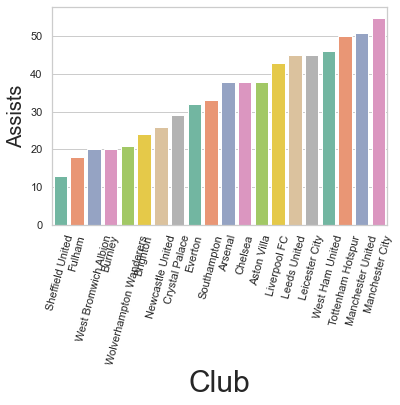

In [7]:
Assist_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club', y='Assists',data=Assist_by_clubs.sort_values(by='Assists'),palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcparams['figure.figsize'] = (5,8)
plt.title('plot of clubs vs total Assists', fontsize=20)            
plt.show()


In [8]:
top_10_assists = epl_df[['Name','Club','Assists','Matches']].nlargest(n=10, columns= 'Assists')
top_10_assists


,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


<AxesSubplot:title={'center':'plot of clubs vs Total Goals'}, xlabel='Club', ylabel='Goals'>

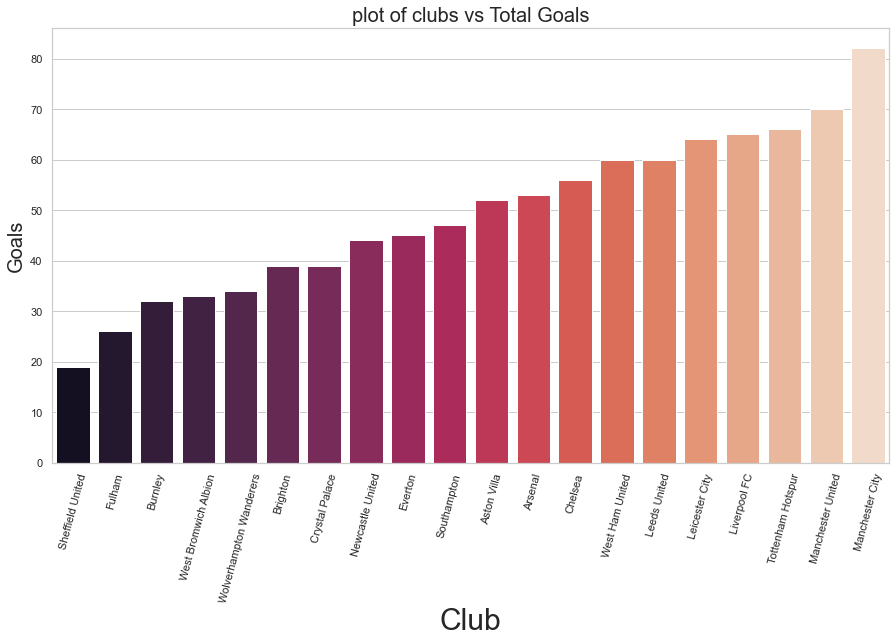

In [43]:
goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Goals', data=goals_by_clubs.sort_values(by='Goals'),palette='rocket')
plt.xlabel('Club',fontsize=30)
plt.ylabel('Goals',fontsize=20)
plt.xticks(rotation=75)
plt.title('plot of clubs vs Total Goals', fontsize= 20)   
ax

In [27]:
top_10_goals_per_match = epl_df[['Name','Goals_Per_Match','Matches','Goals']].nlargest(n=10,columns='Goals_Per_Match')
top_10_goals_per_match

,Name,Goals_Per_Match,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


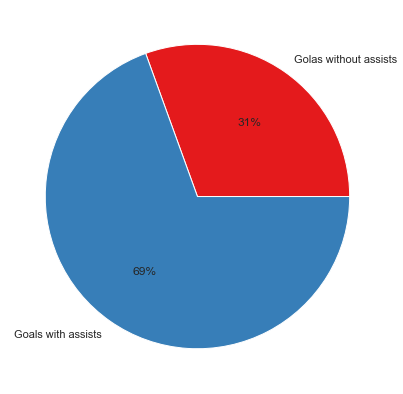

In [38]:
plt.figure(figsize=(14,7))
assists = epl_df['Assists'].sum()
data = [Total_Goals - assists, assists]

labels = ['Golas without assists','Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color,autopct= '%.0f%%')
plt.show()

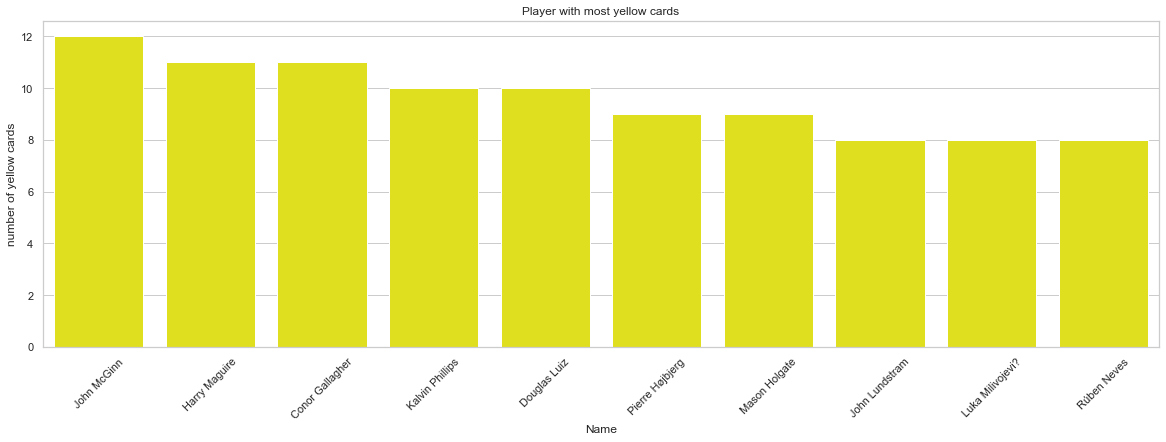

In [44]:
epl_yellow = epl_df.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Player with most yellow cards')
c=sns.barplot(x=epl_yellow['Name'], y=epl_yellow['Yellow_Cards'],label='Players',color='yellow')
plt.ylabel('number of yellow cards')
plt.xticks(rotation=45)
plt.show()